In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [4]:
train=pd.read_csv(r"/content/drive/MyDrive/Apple_Leaf_Disease/plant_img/train.csv")
test=pd.read_csv(r"/content/drive/MyDrive/Apple_Leaf_Disease/plant_img/test.csv")

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le =LabelEncoder()

In [7]:
train['image_id']= le.fit_transform(train['image_id'])

In [8]:
train['image_id'].unique()

array([  0,   1, 933, ..., 911, 912, 914])

In [9]:
train.head()

image_id  healthy  multiple_diseases  rust  scab
0         0        0                  0     0     1
1         1        0                  1     0     0
2       933        1                  0     0     0
3      1044        0                  0     1     0
4      1155        1                  0     0     0

In [10]:
le =LabelEncoder()
test['image_id']= le.fit_transform(test['image_id'])
test['image_id'].unique()
test.head()

image_id
0         0
1         1
2       933
3      1044
4      1155

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.2, random_state=42)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

from xgboost import XGBClassifier

model = XGBClassifier()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [13]:
test_1 = X_test.iloc[1]
X_train.shape

(1456, 5)

In [14]:
from sklearn.neural_network import MLPClassifier
anna = MLPClassifier(max_iter=500,activation='relu',hidden_layer_sizes=(2, 2))


In [15]:
anna.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(2, 2), max_iter=500)

In [16]:
y_train

array([ 411,  500,  844, ..., 1337,  414,  114])

In [17]:
y_test

image_id
1511       571
1799       889
135        391
408       1165
1693       772
...        ...
1404       452
432       1192
1263       295
170        780
292       1036

[365 rows x 1 columns]

In [18]:
pred=anna.predict(X_test)
pred

array([ 576, 1208,  358, 1441,  899, 1208, 1441,  899, 1441, 1441, 1441,
       1441, 1441,  899, 1441,  386, 1441,  386, 1441,   22,   22, 1441,
       1441, 1208,  470, 1441, 1441, 1441, 1208,  899,   22,  386, 1441,
       1441, 1441, 1441, 1441,  740,   22, 1441,   11, 1441, 1441, 1441,
        899,  899,   22,  386,  276, 1208,   22, 1441,   22,  899,  432,
       1441, 1441, 1441, 1441,  276,  386,   22, 1208,  576, 1208, 1441,
       1441, 1441, 1441,  899,  576, 1441,  576,  740,   22, 1441,   22,
        276,  899,  276, 1441, 1441,   11, 1441, 1441,   22, 1441, 1441,
       1441, 1441, 1208, 1208,   22,   26, 1441, 1441,  899, 1441,  899,
       1441, 1208, 1441, 1441,   91,  899, 1441,  276,   11,  899, 1441,
        899, 1441, 1441, 1441,   91, 1441, 1441, 1441, 1208, 1441, 1208,
       1441, 1441, 1208, 1441, 1441,   22, 1441,   22, 1441,  576, 1441,
       1441,   22, 1441,  576,   26,  899,   22, 1441, 1441,   26,   22,
         22, 1441,   22,  899,   22, 1441, 1441, 14

In [19]:
from sklearn.metrics import classification_report
classification_report(y_test,pred)
classifier_tree = MLPClassifier(max_iter=500,activation='relu',hidden_layer_sizes=(2, 2))
y_predict = classifier_tree.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_predict))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           8       0.03      1.00      0.06         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         1
          43       0.00      0.00      0.00         1
          48       0.00      0.00      0.00         1
          51       0.00      0.00      0.00         1
          55       0.00      0.00      0.00         1
          61       0.00      0.00      0.00         1
          66       0.00      0.00      0.00         1
          86       0.00      0.00      0.00         1
          89       0.00      0.00      0.00         1
          94       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being se

In [20]:
! pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=47cb09d5053ba8850308a5f3fe545dfab6c975af57ccfa31b71c3c205577ce68
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [21]:
import lime
from lime import lime_tabular

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification',
    verbose=True
)


lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=anna.predict_proba,
    num_features=4,top_labels=1
)
lime_exp.show_in_notebook(show_table=True)

Intercept 0.0012529038604639283
Prediction_local [0.00090608]
Right: 0.00122857167755902


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [22]:
lime_explainer = lime_tabular.LimeTabularExplainer(np.array(train),
    feature_names=train.columns,verbose=True,

    mode='classification')

In [23]:
lime_exp = lime_explainer.explain_instance(
    X_test.iloc[0],
    anna.predict_proba
)
lime_exp.show_in_notebook(show_table=True)

Intercept 0.0005254220268118644
Prediction_local [2.25987289e-05]
Right: 9.875557634389188e-09


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [24]:
lime_exp.predict_proba
import numpy as np
import pandas as pd
wine = pd.read_csv(r'/content/drive/MyDrive/Apple_Leaf_Disease/plant_img/sample_submission.csv')
wine.head()


image_id  healthy  multiple_diseases  rust  scab
0   Test_0     0.25               0.25  0.25  0.25
1   Test_1     0.25               0.25  0.25  0.25
2   Test_2     0.25               0.25  0.25  0.25
3   Test_3     0.25               0.25  0.25  0.25
4   Test_4     0.25               0.25  0.25  0.25

In [25]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
wine['image_id']= le.fit_transform(wine['image_id'])
wine['image_id'].unique()
from sklearn.model_selection import train_test_split
X = wine.drop('image_id', axis=1)
y = wine['image_id']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [26]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

test_1 = X_test.iloc[1]

In [27]:
from sklearn.neural_network import MLPClassifier
anna = MLPClassifier(max_iter=500,activation='relu',hidden_layer_sizes=(2, 2))
anna.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(2, 2), max_iter=500)

In [28]:
pred=anna.predict(X_test)
pred
from sklearn.metrics import classification_report
classification_report(y_test,pred)
classifier_tree = MLPClassifier(max_iter=500,activation='relu',hidden_layer_sizes=(2, 2))
y_predict = classifier_tree.fit(X_train, y_train).predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [29]:
print(classification_report(y_test, y_predict))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)
from sklearn import svm
logmodel = svm.SVC()
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

              precision    recall  f1-score   support

           5       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       1.0
          33       0.00      0.00      0.00       1.0
          40       0.00      0.00      0.00       1.0
          41       0.00      0.00      0.00       1.0
          43       0.00      0.00      0.00       1.0
          48       0.00      0.00      0.00       1.0
          51       0.00      0.00      0.00       1.0
          55       0.00      0.00      0.00       1.0
          61       0.00      0.00      0.00       1.0
          66       0.00      0.00      0.00       1.0
          86       0.00      0.00      0.00       1.0
          89       0.00      0.00      0.00       1.0
          95       0.00      0.00      0.00       1.0
          97       0.00    

SVC()

In [30]:
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
classification_report(y_test,predictions)
classifier_tree = svm.SVC()
y_predict = classifier_tree.fit(X_train, y_train).predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
y_predict = classifier_tree.fit(X_train, y_train).predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [32]:
from sklearn import tree
logmodel = tree.DecisionTreeClassifier()
logmodel.fit(X_train, y_train)


DecisionTreeClassifier()

In [33]:
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
classification_report(y_test,predictions)
classifier_tree = tree.DecisionTreeClassifier()
y_predict = classifier_tree.fit(X_train, y_train).predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [34]:
print(classification_report(y_test, y_predict))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       1.0
          33       0.00      0.00      0.00       1.0
          40       0.00      0.00      0.00       1.0
          41       0.00      0.00      0.00       1.0
          43       0.00      0.00      0.00       1.0
          48       0.00      0.00      0.00       1.0
          51       0.00      0.00      0.00       1.0
          55       0.00      0.00      0.00       1.0
          61       0.00      0.00      0.00       1.0
          66       0.00      0.00      0.00       1.0
          86       0.00      0.00      0.00       1.0
          89       0.00      0.00      0.00       1.0
          95       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [36]:
import lime
from lime import lime_tabular

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification'
)


lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=logmodel.predict_proba
)
lime_exp.show_in_notebook(show_table=True)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [37]:
lime_exp.predict_proba

array([0.00068681, 0.00068681, 0.00068681, ..., 0.00068681, 0.00068681,
       0.00068681])

In [38]:
! pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 31.8 MB/s eta 0:00:00


In [40]:
import xgboost
import shap
import pandas as pd
X=pd.read_csv(r"/content/drive/MyDrive/Apple_Leaf_Disease/plant_img/train.csv")
y=pd.read_csv(r"/content/drive/MyDrive/Apple_Leaf_Disease/plant_img/test.csv")
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
X['image_id']= le.fit_transform(X['image_id'])
X['image_id'].unique()
y['image_id']= le.fit_transform(y['image_id'])
y['image_id']= le.fit_transform(y['image_id'])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
model = xgboost.XGBRegressor().fit(X, y)

In [42]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


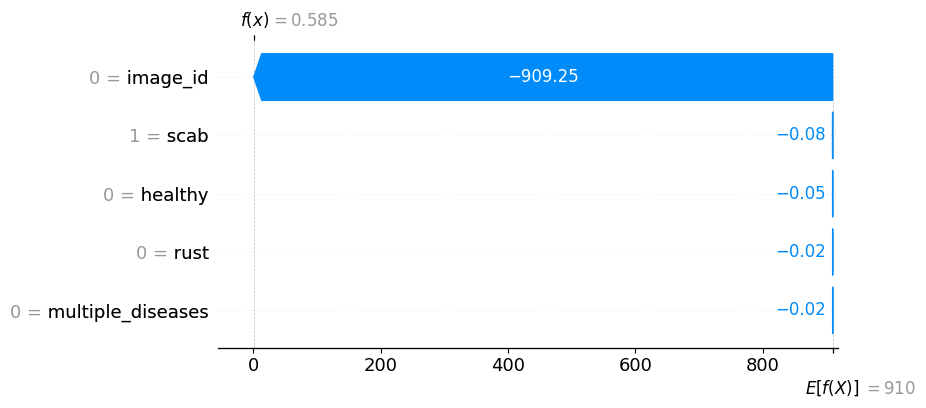

In [43]:
shap.plots.waterfall(shap_values[0])

In [44]:
shap.plots.force(shap_values[0])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


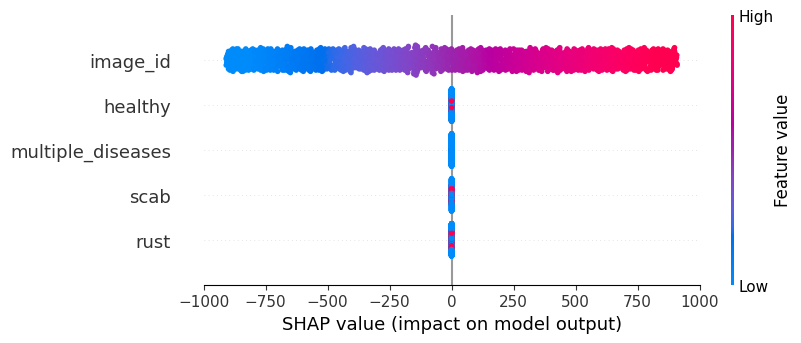

In [45]:
shap.plots.beeswarm(shap_values)

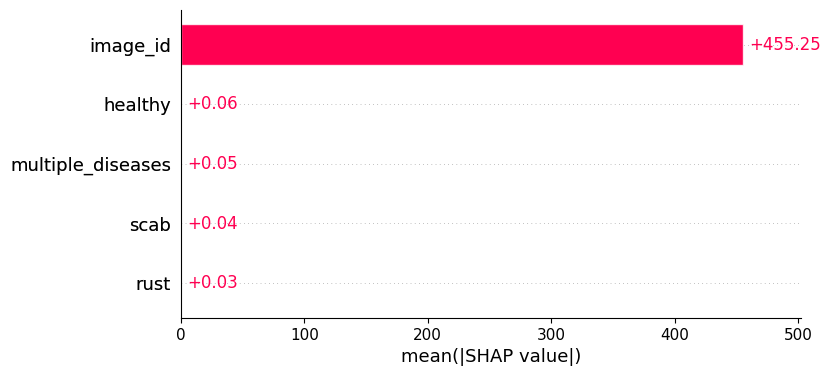

In [46]:
shap.plots.bar(shap_values)

In [47]:
train=pd.read_csv(r"/content/drive/MyDrive/Apple_Leaf_Disease/plant_img/train.csv")
test=pd.read_csv(r"/content/drive/MyDrive/Apple_Leaf_Disease/plant_img/test.csv")


SVM model

In [48]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)

SVC(random_state=0)

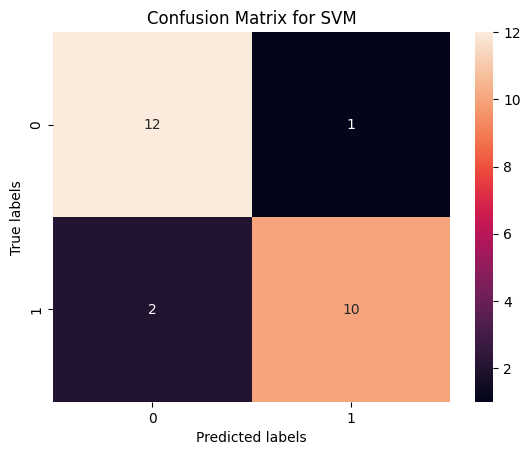

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix for SVM');
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1'])
plt.savefig('SVM_heatmap',dpi=400)

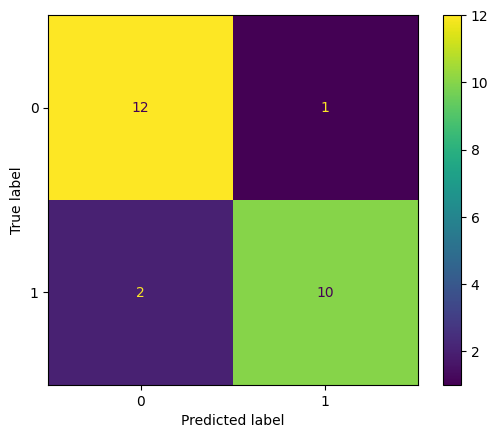

<Figure size 640x480 with 0 Axes>

In [53]:
import matplotlib.pyplot as plt
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()
plt.savefig('SVM',dpi=400)

In [50]:
from sklearn import metrics
Accuracy = metrics.accuracy_score(y_test, predictions)
Precision = metrics.precision_score(y_test, predictions)
Sensitivity_recall = metrics.recall_score(y_test, predictions)
Specificity = metrics.recall_score(y_test, predictions, pos_label=0)
F1_score = metrics.f1_score(y_test, predictions)

In [51]:
print({"Accuracy":Accuracy,
       "Precision":Precision,
       "Sensitivity_recall":Sensitivity_recall,
       "Specificity":Specificity,
       "F1_score":F1_score})


{'Accuracy': 0.88, 'Precision': 0.9090909090909091, 'Sensitivity_recall': 0.8333333333333334, 'Specificity': 0.9230769230769231, 'F1_score': 0.8695652173913043}


In [69]:
from sklearn.neural_network import MLPClassifier
anna = MLPClassifier(max_iter=500,activation='relu',hidden_layer_sizes=(2, 2))
anna.fit(X_train,y_train)

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.


MLPClassifier(hidden_layer_sizes=(2, 2), max_iter=500)

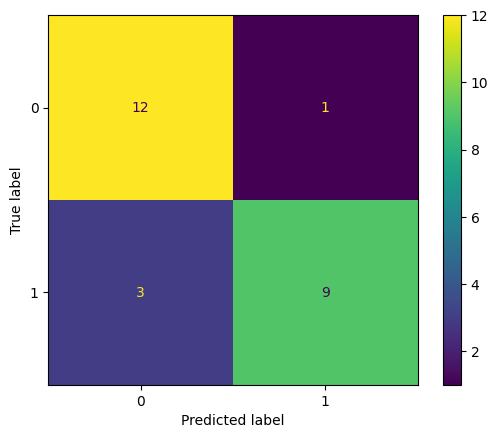

In [65]:
pred=anna.predict(X_test)
predictions = anna.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

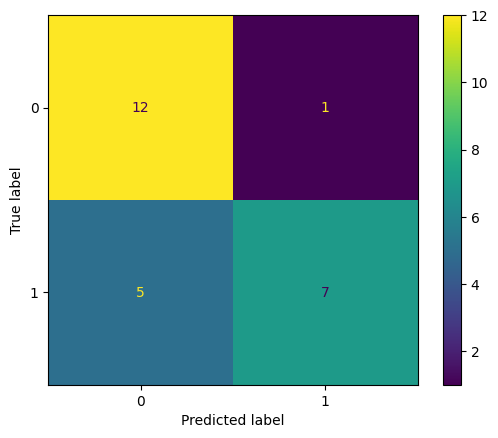

In [70]:
pred=anna.predict(X_test)
predictions = anna.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

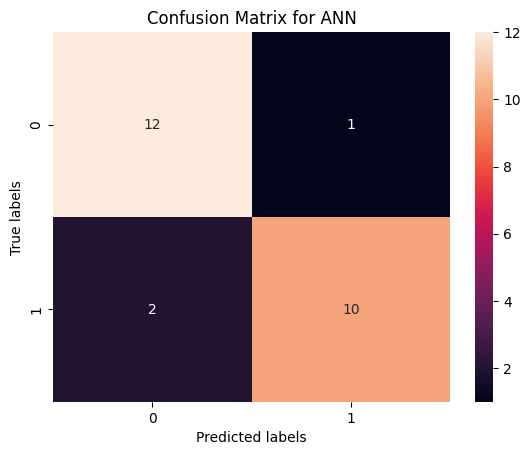

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix for ANN');
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1'])
plt.savefig('ANN11',dpi=400)

In [71]:
from sklearn import metrics
Accuracy = metrics.accuracy_score(y_test, predictions)
Precision = metrics.precision_score(y_test, predictions)
Sensitivity_recall = metrics.recall_score(y_test, predictions)
Specificity = metrics.recall_score(y_test, predictions, pos_label=0)
F1_score = metrics.f1_score(y_test, predictions)

print({"Accuracy":Accuracy,
       "Precision":Precision,
       "Sensitivity_recall":Sensitivity_recall,
       "Specificity":Specificity,
       "F1_score":F1_score})

{'Accuracy': 0.76, 'Precision': 0.875, 'Sensitivity_recall': 0.5833333333333334, 'Specificity': 0.9230769230769231, 'F1_score': 0.7000000000000001}


In [58]:
from sklearn import tree
logmodel = tree.DecisionTreeClassifier()
logmodel.fit(X_train, y_train)

DecisionTreeClassifier()

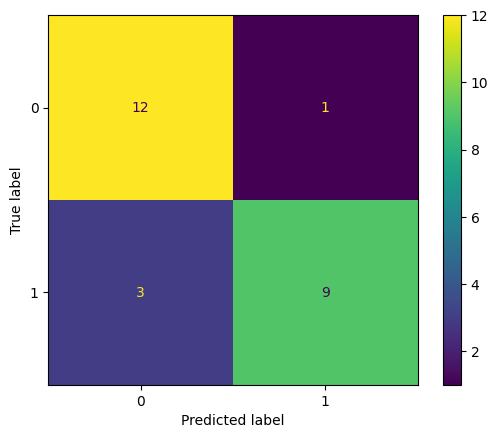

In [59]:
predictions = logmodel.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

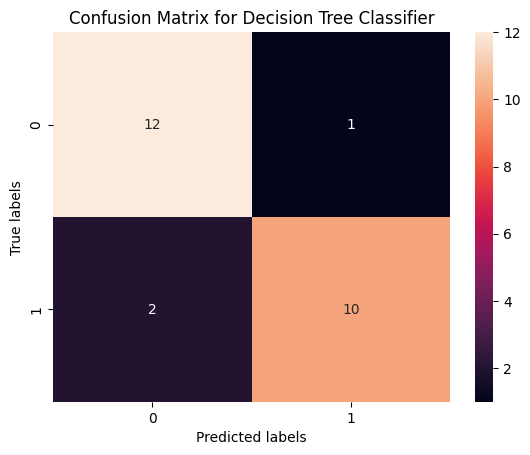

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix for Decision Tree Classifier');
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1'])
plt.savefig('DecisionTree_heatmap',dpi=400)

In [62]:
from sklearn import metrics
Accuracy = metrics.accuracy_score(y_test, predictions)
Precision = metrics.precision_score(y_test, predictions)
Sensitivity_recall = metrics.recall_score(y_test, predictions)
Specificity = metrics.recall_score(y_test, predictions, pos_label=0)
F1_score = metrics.f1_score(y_test, predictions)

In [63]:
print({"Accuracy":Accuracy,
       "Precision":Precision,
       "Sensitivity_recall":Sensitivity_recall,
       "Specificity":Specificity,
       "F1_score":F1_score})


{'Accuracy': 0.88, 'Precision': 0.9090909090909091, 'Sensitivity_recall': 0.8333333333333334, 'Specificity': 0.9230769230769231, 'F1_score': 0.8695652173913043}
